<a href="https://colab.research.google.com/github/Ajlackey8/sales_predictions/blob/main/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_csv('/content/drive/MyDrive/Coding Dojo/Projects/sales_predictions.csv')

In [ ]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


1) How many rows and columns?

In [ ]:
df.shape

#8523 rows
#12 columns

(8523, 12)

2) What are the datatypes of each variable?

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


3) Are there duplicates? If so, drop any duplicates.

In [ ]:
df.duplicated().sum()

#there are no duplicates

0

4) Identify missing values.

In [ ]:
df.isna().sum()

#There are 1463 missing weights and 2410 missing sizes

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

5) Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).

In [ ]:
df[df['Item_Weight'].isna()==True]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [ ]:
df[df['Item_Identifier']=='FDP10']

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
585,FDP10,19.0,Low Fat,0.128066,Snack Foods,104.3622,OUT035,2004,Small,Tier 2,Supermarket Type1,1905.5196
2623,FDP10,19.0,Low Fat,0.128815,Snack Foods,107.6622,OUT017,2007,NaN,Tier 2,Supermarket Type1,1164.4842
3382,FDP10,19.0,Low Fat,0.128289,Snack Foods,104.9622,OUT049,1999,Medium,Tier 1,Supermarket Type1,1164.4842
4585,FDP10,19.0,Low Fat,0.128090,Snack Foods,107.0622,OUT046,1997,Small,Tier 1,Supermarket Type1,1376.2086
6087,FDP10,19.0,Low Fat,0.128350,Snack Foods,106.5622,OUT045,2002,NaN,Tier 2,Supermarket Type1,1482.0708
7883,FDP10,19.0,Low Fat,0.127984,Snack Foods,107.6622,OUT013,1987,High,Tier 3,Supermarket Type1,1270.3464


In [ ]:
df.set_index('Item_Identifier')['Item_Weight']
df.groupby('Item_Identifier')['Item_Weight'].median()

Item_Identifier
DRA12    11.600
DRA24    19.350
DRA59     8.270
DRB01     7.390
DRB13     6.115
          ...  
NCZ30     6.590
NCZ41    19.850
NCZ42    10.500
NCZ53     9.600
NCZ54    14.650
Name: Item_Weight, Length: 1559, dtype: float64

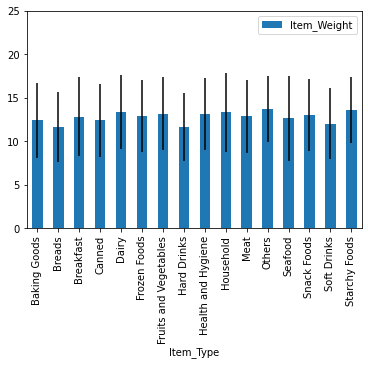

In [ ]:
# Initially I thought a decent way of predicting the weight of an item would be to apply the average weight of items within it's category. For instance I assumed that most breads would exist in a certain rough weight zone, and most canned goods would exist in another.
# So that filling in missing weights with the average weight of their type would give a satisfactory guess at their weight. However, all categories appear to have nearly the same weight and also nearly the same standard deviation around their mean. So i'm guessing these weight data are randomly generated
df.groupby('Item_Type').describe()
stdweight = df.groupby('Item_Type').std()['Item_Weight']
df.groupby('Item_Type').mean().plot(y='Item_Weight',kind='bar', ylim=(0,25), yerr=stdweight)

# Whether this is makes the weight highly meaningful or meaningless I suppose depends largely on the question being asked.

# df.groupby('Outlet_Size').plot(x='Item_Outlet_Sales',y='Item_Weight', kind='scatter')

#There appears to be no meaningful relationship between weight and sales (even accounting for store size, as smaller supermarkets might struggle with larger heavier goods potentially), so I guess weight only really has relevance for difficulty of shipping/stocking?
#Lets see if theres a pattern correlation between weight and anything else.

# df.plot(x='Item_Weight',y='Item_MRP',kind='scatter')
# df.plot(x='Item_Weight',y='Item_Visibility',kind='scatter')

#I see no correlations with weight and all categories have similar weights so despite being a significant chunk of our data, I think it'll be fine to fill in an average.

mean_weight = df['Item_Weight'].mean()
df['Item_Weight'].fillna(mean_weight, inplace=True)

In [ ]:
#Moving onto Outlet size
#We have 4 columns that are almost certainly correlated so I think this will be another good fill opportunity.

df.groupby(['Outlet_Type','Outlet_Location_Type','Outlet_Size'], dropna=False).count()

#We can now tell that there are only 2 types of stores getting Nan. Tier 3 Grocery stores (555) and Tier 2 Supermarket Type 1s
#I'm guessing there is a correlation between size and sales volume so we could look at that (larger stores on average are going to need to move more goods to keep the lights on so will serve higher traffic areas)
#It's more worth than I'm willing to do right now to normalize the sales volume against the number of instances so that the differing amounts of store sizes doesn't shift the graph. Though thats probably the best approach to determining the "size" it should be assigned.
#i'd also need to replace the values in a new dataframe with interger representations to plot correctly, so instead i'm just going to use my GUT like all data scientists shouldn't do when they get lazy.

df.groupby(['Outlet_Type','Outlet_Location_Type','Outlet_Size'], dropna=False).mean()

# Since it appears that 2 distinct store types just didnt have their size logged. There is a clear trend where higher "tier" stores are larger in size. With Tier 3 only being Nan, medium and high and tier 1 grocery stores being small. So I think its a safe bet to fill medium in
# for tier 3 grocery store. As well as Tier 2 supermarket being small/nan it is fairly clear it should also be medium. As if it was going to be high, tier 2 "small" likely would have been medium. The jump from small to high in the same tier would be odd.
# in other words I think all the current Nan values for Outlet_Size can be reasonably estimated to be "Medium"


# df['Outlet_Size'].fillna('Medium', inplace=True)

Item_Weight  \
Outlet_Type       Outlet_Location_Type Outlet_Size                
Grocery Store     Tier 1               Small                NaN   
                  Tier 3               NaN            12.913153   
Supermarket Type1 Tier 1               Medium         12.917446   
                                       Small          12.866801   
                  Tier 2               Small          12.829349   
                                       NaN            12.738186   
                  Tier 3               High           13.006148   
Supermarket Type2 Tier 3               Medium         12.873346   
Supermarket Type3 Tier 3               Medium               NaN   

                                                    Item_Visibility  \
Outlet_Type       Outlet_Location_Type Outlet_Size                    
Grocery Store     Tier 1               Small               0.108441   
                  Tier 3               NaN                 0.101457   
Supermarket Type1 Tier 1               Medium              0.060806   
                                       Small               0.060464   
                  Tier 2               Small               0.061263   
                                       NaN                 0.060925   
                  Tier 3               High                0.059957   
Supermarket Type2 Tier 3               Medium              0.061014   
Supermarket Type3 Tier 3               Medium              0.058615   

                                                      Item_MRP  \
Outlet_Type       Outlet_Location_Type Outlet_Size               
Grocery Store     Tier 1               Small        139.787088   
                  Tier 3               NaN          140.777594   
Supermarket Type1 Tier 1               Medium       140.297699   
                                       Small        142.057387   
                  Tier 2               Small        143.122481   
                                       NaN          140.186919   
                  Tier 3               High         141.425982   
Supermarket Type2 Tier 3               Medium       141.678634   
Supermarket Type3 Tier 3               Medium       139.801791   

                                                    Outlet_Establishment_Year  \
Outlet_Type       Outlet_Location_Type Outlet_Size                              
Grocery Store     Tier 1               Small                      1985.000000   
                  Tier 3               NaN                        1998.000000   
Supermarket Type1 Tier 1               Medium                     1999.000000   
                                       Small                      1997.000000   
                  Tier 2               Small                      2004.000000   
                                       NaN                        2004.495957   
                  Tier 3               High                       1987.000000   
Supermarket Type2 Tier 3               Medium                     2009.000000   
Supermarket Type3 Tier 3               Medium                     1985.000000   

                                                    Item_Outlet_Sales  
Outlet_Type       Outlet_Location_Type Outlet_Size                     
Grocery Store     Tier 1               Small               340.329723  
                  Tier 3               NaN                 339.351662  
Supermarket Type1 Tier 1               Medium             2348.354635  
                                       Small              2277.844267  
                  Tier 2               Small              2438.841866  
                                       NaN                2266.410119  
                  Tier 3               High               2298.995256  
Supermarket Type2 Tier 3               Medium             1995.498739  
Supermarket Type3 Tier 3               Medium             3694.038558

6) Confirm that there are no missing values after addressing them.

In [ ]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

7) Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent) 

In [ ]:
df.info()
df['Item_Identifier'].value_counts() #These are item IDs so aside from a case issue this should be fine
df['Item_Fat_Content'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [ ]:
df['Item_Fat_Content'].replace({
    'LF':'Low Fat',
    'low fat': 'Low Fat',
    'reg': 'Regular'
}, inplace=True)
df['Item_Fat_Content'].value_counts() #fixed Fat Content

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [ ]:
df['Item_Type'].value_counts() #fine
df['Outlet_Identifier'].value_counts() #fine
#the other three outlet types are fine we just used them so I would have seen.

OUT027    935
OUT013    932
OUT049    930
OUT046    930
OUT035    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

8) For any numerical columns, obtain the summary statistics of each (min, max, mean)

In [ ]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


* Histogram to view the distributions of various features in your dataset.
* Boxplot to view statistical summaries of various features in your dataset.
* Heatmap of the correlation between features.




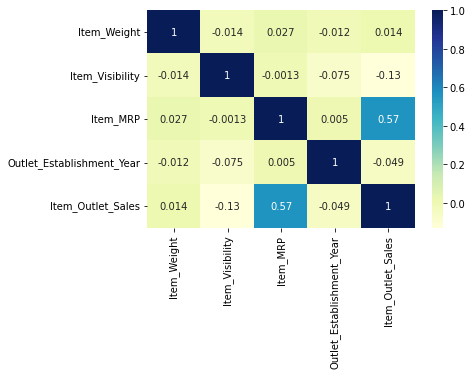

In [12]:
#lets start by using a general correlation heatmap to find a predictive relationship to explore

df_corr = df.corr()
sns.heatmap(df_corr, annot=True, cmap = 'YlGnBu', );

#it appears price and sales volume are correlated (as one might expect)

[ 15.55302354 -11.57514283]


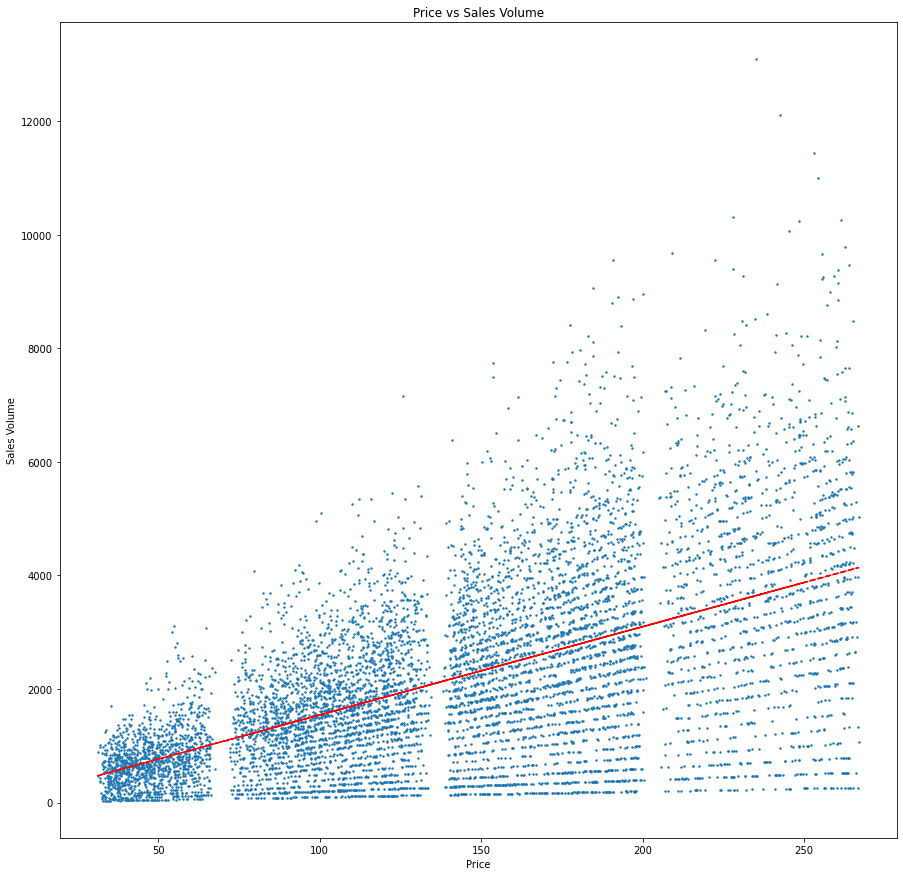

In [51]:
#lets explore it with a simply scatter plot of sales vs prices
#first declaring some variables to make trendline neater.
x = df['Item_MRP']
y= df['Item_Outlet_Sales']
z = np.polyfit(x,y,1)
y_new = np.poly1d(z)(x)
print(z)

f, ax = plt.subplots(figsize=(15,15))
ax.scatter(x,y,2)
ax.plot(x,y_new,'r--')
ax.set(title='Price vs Sales Volume', xlabel='Price',ylabel='Sales Volume');

#this is certainly not the relationship I was expecting, the higher somethings price, the higher it's sales volume!
#according to this, for every dollar you increase the price you should see about 15 additional sales! We're gonna be rich!

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


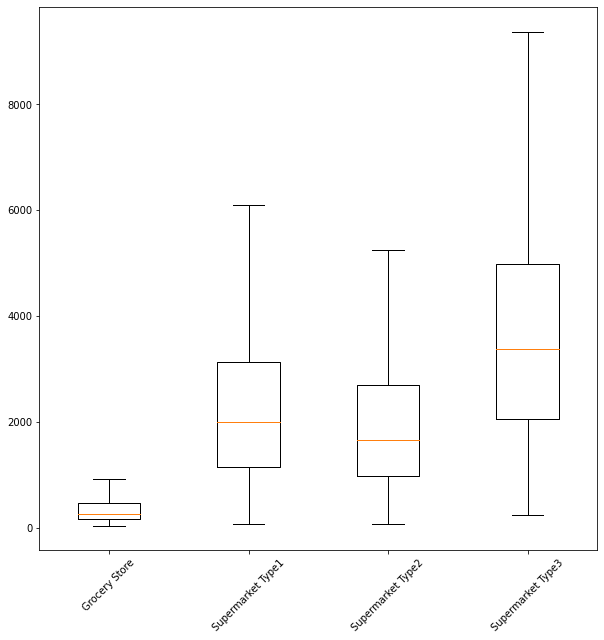

In [78]:
from matplotlib.cbook import get_sample_data
#Lets also explore the relationship between sales volume by outlet type, I'm fairly certain we should see increased volumes of sales with larger stores. But just to be sure, I mean heck we were wrong about lower prices meaning more sales.
#creating a dictionary with way too long of keys to make sure that despite trying to neaten up my boxplot line, I keep it as bloated and wordy as possible.
valuecall = {
    'Grocery Store' : df[df['Outlet_Type']=='Grocery Store']['Item_Outlet_Sales'],
    'Supermarket Type1' : df[df['Outlet_Type']=='Supermarket Type1']['Item_Outlet_Sales'],
    'Supermarket Type2' : df[df['Outlet_Type']=='Supermarket Type2']['Item_Outlet_Sales'],
    'Supermarket Type3' : df[df['Outlet_Type']=='Supermarket Type3']['Item_Outlet_Sales']
}

fig, ax = plt.subplots(figsize=(10,10))
ax.boxplot([valuecall['Grocery Store'],valuecall['Supermarket Type1'],valuecall['Supermarket Type2'],valuecall['Supermarket Type3']], labels=['Grocery Store','Supermarket Type1','Supermarket Type2','Supermarket Type3'], showfliers=False)
plt.xticks(rotation = 45);

#It appears that increasing outlet type does infact correlate with sales volume, though market 1 and 2 are fairly comparable so this connection isn't *that* strong

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


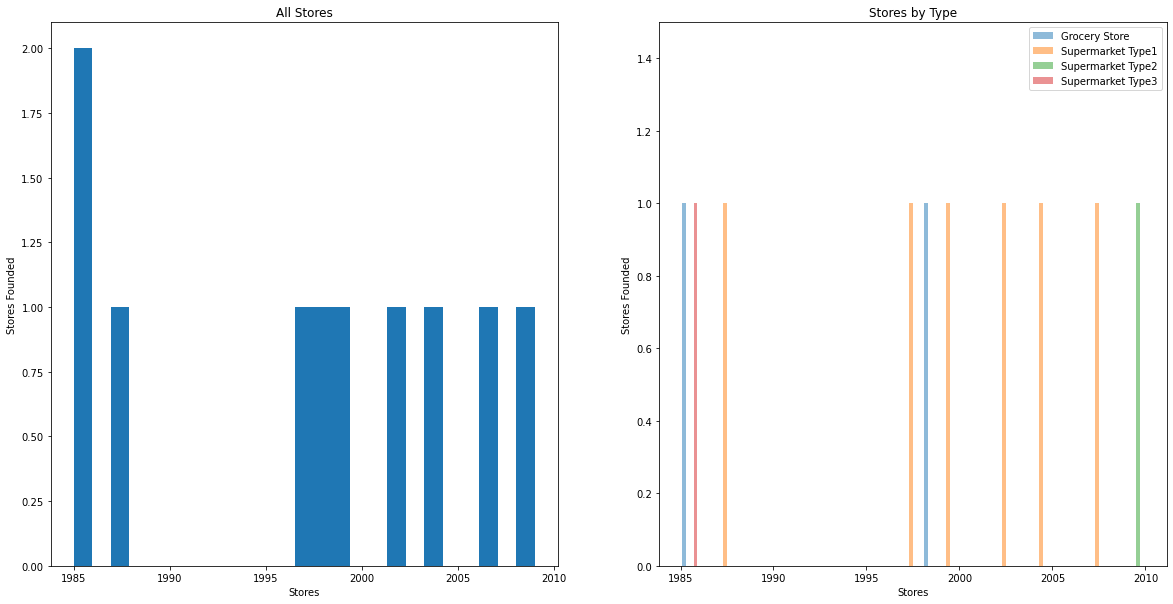

In [129]:
#finally lets create a histogram that gives us a rough idea of when all these stores were founded around.

df_dup = df.drop_duplicates(subset='Outlet_Identifier', keep='first')
#There are only 10 stores so I made a new dataset that narrows it down to just those stores

fig, (ax1,ax2) = plt.subplots(1,2,figsize=(20,10))
ax1.hist(df_dup['Outlet_Establishment_Year'],bins=25)
ax2.hist([df_dup[df_dup['Outlet_Type']=='Grocery Store']['Outlet_Establishment_Year'],
          df_dup[df_dup['Outlet_Type']=='Supermarket Type1']['Outlet_Establishment_Year'],
          df_dup[df_dup['Outlet_Type']=='Supermarket Type2']['Outlet_Establishment_Year'],
          df_dup[df_dup['Outlet_Type']=='Supermarket Type3']['Outlet_Establishment_Year']],
          alpha = 0.5, bins=25, range=(1985,2010), label=['Grocery Store','Supermarket Type1','Supermarket Type2','Supermarket Type3'])
ax1.set(xlabel='Stores',ylabel='Stores Founded', title="All Stores")
ax2.set(xlabel='Stores',ylabel='Stores Founded', title="Stores by Type", ylim=[0,1.5])
ax2.legend();

#The thing I draw from this is that the expansion of new Supermarket type 1s has been fairly consistent and well spaced out, though there was an odd drought of expansion in the early 90s.